In [1]:
import pandas as pd
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
# warnings.filterwarnings('ignore')

In [2]:
data_dir = 'data_boston_ma-delta_20211005'

In [5]:
# authors
df = pd.read_csv(
    os.path.join(data_dir, "nextstrain_sars-cov-2_ma-delta_20211005_cluster-unique-usher_authors.tsv"),
    sep="\t",
)

print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"\nDataset Shape: {df.shape}")
print(f"{df.shape[0]} submissions")


print(f'{df['n (strains)'].sum()} total strains')

print(f"Sample strains entries:")
print(df['strains'].head())



DATASET OVERVIEW

Dataset Shape: (1569, 6)
1569 submissions
1569 total strains
Sample strains entries:
0                        USA/MA-CDC-MA1/2020
1                      USA/MA-DPH-00009/2020
2                      USA/MA_MGH_00071/2020
3              USA/MA-CDC-STM-000028441/2021
4    USA/MA-CDCBI-CRSP_NWSBNGM6I2BHDDRQ/2021
Name: strains, dtype: object


In [17]:
# metadata
df = pd.read_csv(
    os.path.join(data_dir, "nextstrain_sars-cov-2_ma-delta_20211005_cluster-unique-usher_metadata.tsv"),
    sep="\t",
)

print(df['location'].value_counts(dropna=False))

location
NaN                    1219
Barnstable County       151
Suffolk County MA        61
Middlesex County MA      40
Bristol County           34
Norfolk County           19
Plymouth County          15
Worcester County         13
Essex County MA          10
Hampden County            4
Worcester County MA       1
Berkshire County          1
Hampshire County          1
Name: count, dtype: int64


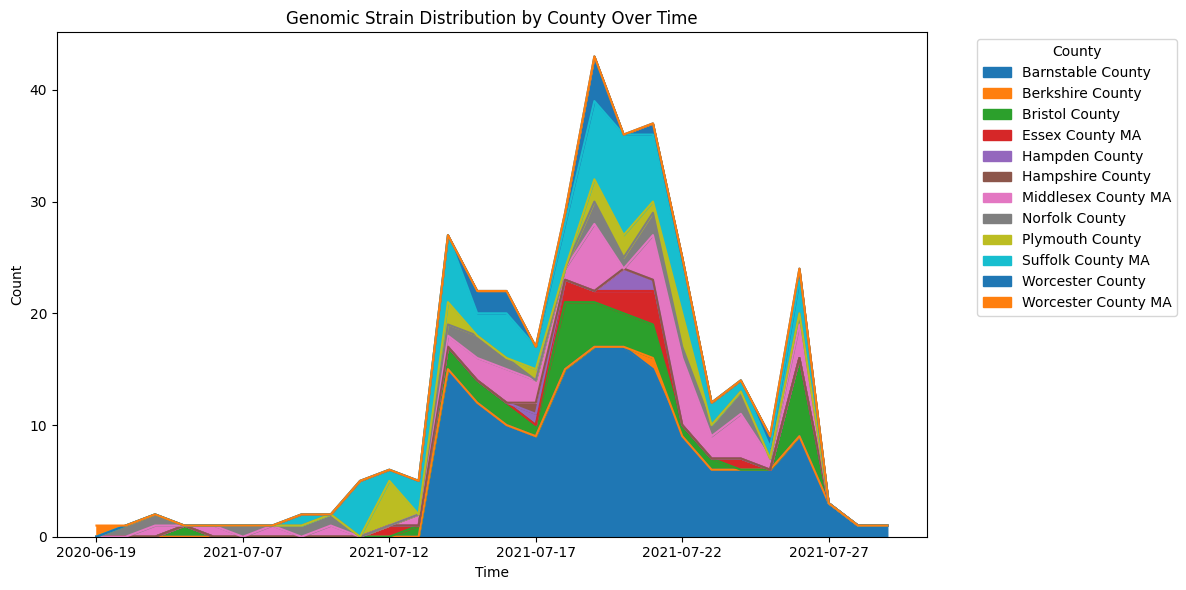

In [18]:
pivot_df = df.groupby(['date', 'location']).size().unstack(fill_value=0)

# Create stacked area chart
pivot_df.plot(kind='area', stacked=True, figsize=(12, 6))
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Genomic Strain Distribution by County Over Time')
plt.legend(title='County', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

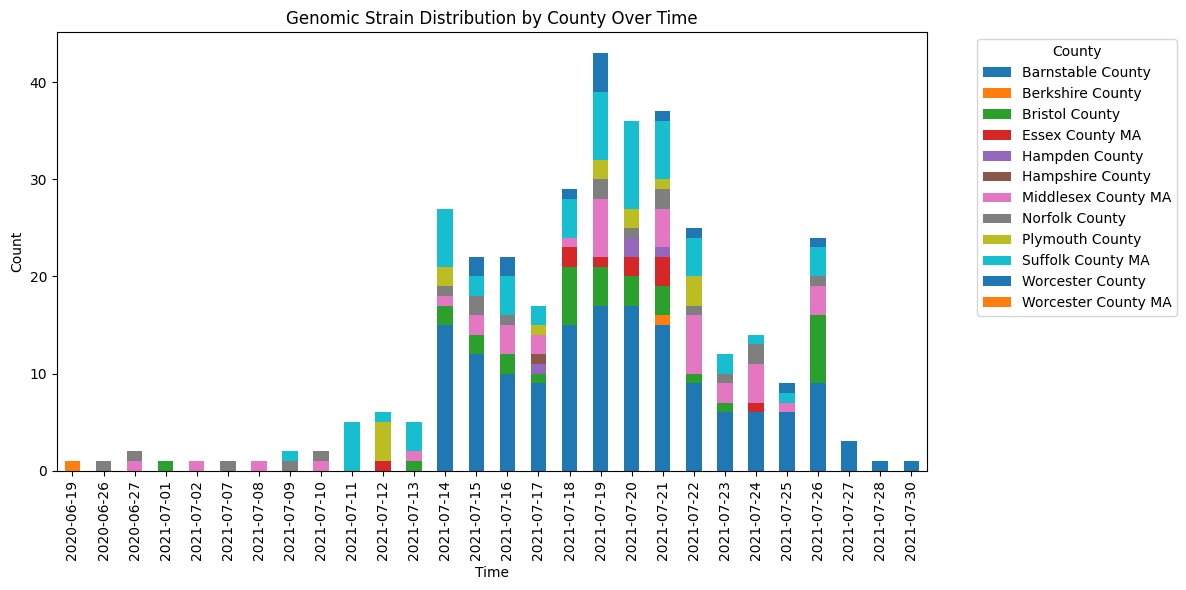

In [20]:
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Genomic Strain Distribution by County Over Time')
plt.legend(title='County', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()